# Principal Component Analysis with Cancer Data

In [1]:
#Import all the necessary modules
#Import all the necessary modules
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Q1. Load the Data file into Python DataFrame and view top 10 rows

In [2]:
data = pd.read_csv("breast-cancer-wisconsin-data.csv")
data.head(10)

,ID,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2
5,1017122,8,10,10,8,7,10,9,7,1,4
6,1018099,1,1,1,1,2,10,3,1,1,2
7,1018561,2,1,2,1,2,1,3,1,1,2
8,1033078,2,1,1,1,2,1,1,1,5,2
9,1033078,4,2,1,1,2,1,2,1,1,2


In [3]:
  # Id columns is to identify rows hence can be skipped in analysis
  # All columns have numerical values
  # Class would be the target variable. Should be removed when PCA is done

In [4]:
#data = data.drop(columns=['ID', 'Class'])

In [5]:
data.head()

,ID,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


# Q2 Print the datatypes of each column and the shape of the dataset. Perform descriptive analysis 

In [6]:
data.shape

(699, 11)

In [7]:
data.dtypes

ID                              int64
ClumpThickness                  int64
Cell Size                       int64
Cell Shape                      int64
Marginal Adhesion               int64
Single Epithelial Cell Size     int64
Bare Nuclei                    object
Normal Nucleoli                 int64
Bland Chromatin                 int64
Mitoses                         int64
Class                           int64
dtype: object

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
ID                             699 non-null int64
ClumpThickness                 699 non-null int64
Cell Size                      699 non-null int64
Cell Shape                     699 non-null int64
Marginal Adhesion              699 non-null int64
Single Epithelial Cell Size    699 non-null int64
Bare Nuclei                    699 non-null object
Normal Nucleoli                699 non-null int64
Bland Chromatin                699 non-null int64
Mitoses                        699 non-null int64
Class                          699 non-null int64
dtypes: int64(10), object(1)
memory usage: 60.1+ KB


In [9]:
data['Bare Nuclei'].value_counts()

1     402
10    132
5      30
2      30
3      28
8      21
4      19
?      16
9       9
7       8
6       4
Name: Bare Nuclei, dtype: int64

In [10]:
#pd.value_counts(data['Bare Nuclei']).plot(kind = 'bar')

In [11]:
data.corr()

,ID,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Normal Nucleoli,Bland Chromatin,Mitoses,Class
ID,1.000000,-0.055308,-0.041603,-0.041576,-0.064878,-0.045528,-0.060051,-0.052072,-0.034901,-0.080226
ClumpThickness,-0.055308,1.000000,0.644913,0.654589,0.486356,0.521816,0.558428,0.535835,0.350034,0.716001
Cell Size,-0.041603,0.644913,1.000000,0.906882,0.705582,0.751799,0.755721,0.722865,0.458693,0.817904
Cell Shape,-0.041576,0.654589,0.906882,1.000000,0.683079,0.719668,0.735948,0.719446,0.438911,0.818934
Marginal Adhesion,-0.064878,0.486356,0.705582,0.683079,1.000000,0.599599,0.666715,0.603352,0.417633,0.696800
Single Epithelial Cell Size,-0.045528,0.521816,0.751799,0.719668,0.599599,1.000000,0.616102,0.628881,0.479101,0.682785
Normal Nucleoli,-0.060051,0.558428,0.755721,0.735948,0.666715,0.616102,1.000000,0.665878,0.344169,0.756616
Bland Chromatin,-0.052072,0.535835,0.722865,0.719446,0.603352,0.628881,0.665878,1.000000,0.428336,0.712244
Mitoses,-0.034901,0.350034,0.458693,0.438911,0.417633,0.479101,0.344169,0.428336,1.000000,0.423170
Class,-0.080226,0.716001,0.817904,0.818934,0.696800,0.682785,0.756616,0.712244,0.423170,1.000000


In [12]:
data.describe()

,ID,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Normal Nucleoli,Bland Chromatin,Mitoses,Class
count,6.990000e+02,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000
mean,1.071704e+06,4.417740,3.134478,3.207439,2.806867,3.216023,3.437768,2.866953,1.589413,2.689557
std,6.170957e+05,2.815741,3.051459,2.971913,2.855379,2.214300,2.438364,3.053634,1.715078,0.951273
min,6.163400e+04,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
25%,8.706885e+05,2.000000,1.000000,1.000000,1.000000,2.000000,2.000000,1.000000,1.000000,2.000000
50%,1.171710e+06,4.000000,1.000000,1.000000,1.000000,2.000000,3.000000,1.000000,1.000000,2.000000
75%,1.238298e+06,6.000000,5.000000,5.000000,4.000000,4.000000,5.000000,4.000000,1.000000,4.000000
max,1.345435e+07,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000


# Q3 Check for missing value check, incorrect data, duplicate data and perform imputation with mean, median, mode as necessary.


In [13]:
data.isna().sum()

ID                             0
ClumpThickness                 0
Cell Size                      0
Cell Shape                     0
Marginal Adhesion              0
Single Epithelial Cell Size    0
Bare Nuclei                    0
Normal Nucleoli                0
Bland Chromatin                0
Mitoses                        0
Class                          0
dtype: int64

In [14]:
for i in data.columns:
    print(i ,':', data[i].unique() )

ID : [ 1000025  1002945  1015425  1016277  1017023  1017122  1018099  1018561
  1033078  1035283  1036172  1041801  1043999  1044572  1047630  1048672
  1049815  1050670  1050718  1054590  1054593  1056784  1057013  1059552
  1065726  1066373  1066979  1067444  1070935  1071760  1072179  1074610
  1075123  1079304  1080185  1081791  1084584  1091262  1096800  1099510
  1100524  1102573  1103608  1103722  1105257  1105524  1106095  1106829
  1108370  1108449  1110102  1110503  1110524  1111249  1112209  1113038
  1113483  1113906  1115282  1115293  1116116  1116132  1116192  1116998
  1117152  1118039  1120559  1121732  1121919  1123061  1124651  1125035
  1126417  1131294  1132347  1133041  1133136  1136142  1137156  1143978
  1147044  1147699  1147748  1148278  1148873  1152331  1155546  1156272
  1156948  1157734  1158247  1160476  1164066  1165297  1165790  1165926
  1166630  1166654  1167439  1167471  1168359  1168736  1169049  1170419
  1170420  1171710  1171795  1171845  1172152 

In [15]:
# No missing values found. So let us try to remove ? from bare nuclei column

# Get count of rows having ?


In [16]:
data['Bare Nuclei'].value_counts()

1     402
10    132
5      30
2      30
3      28
8      21
4      19
?      16
9       9
7       8
6       4
Name: Bare Nuclei, dtype: int64

In [17]:
data['Bare Nuclei'].unique()

array(['1', '10', '2', '4', '3', '9', '7', '?', '5', '8', '6'],
      dtype=object)

In [18]:
# We could see "?" values in column, this should be removed from data set

# Check for missing value in any other column

In [19]:
# 16 values are corrupted. We can either delete them as it forms roughly 2% of data.
# Here we would like to impute it with suitable values

In [20]:
data['Bare Nuclei'] = data['Bare Nuclei'].replace('?', '1')

In [21]:
data['Bare Nuclei'].unique()

array(['1', '10', '2', '4', '3', '9', '7', '5', '8', '6'], dtype=object)

In [22]:
data['Bare Nuclei'] = data['Bare Nuclei'].astype('int')

In [23]:
data['Bare Nuclei'].unique()

array([ 1, 10,  2,  4,  3,  9,  7,  5,  8,  6], dtype=int64)

# Q4. Perform bi variate analysis including correlation, pairplots and state the inferences. 


In [24]:
# Check for correlation of variable

In [25]:
data.corr()

,ID,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Mitoses,Class
ID,1.000000,-0.055308,-0.041603,-0.041576,-0.064878,-0.045528,-0.092533,-0.060051,-0.052072,-0.034901,-0.080226
ClumpThickness,-0.055308,1.000000,0.644913,0.654589,0.486356,0.521816,0.590008,0.558428,0.535835,0.350034,0.716001
Cell Size,-0.041603,0.644913,1.000000,0.906882,0.705582,0.751799,0.686673,0.755721,0.722865,0.458693,0.817904
Cell Shape,-0.041576,0.654589,0.906882,1.000000,0.683079,0.719668,0.707474,0.735948,0.719446,0.438911,0.818934
Marginal Adhesion,-0.064878,0.486356,0.705582,0.683079,1.000000,0.599599,0.666971,0.666715,0.603352,0.417633,0.696800
Single Epithelial Cell Size,-0.045528,0.521816,0.751799,0.719668,0.599599,1.000000,0.583701,0.616102,0.628881,0.479101,0.682785
Bare Nuclei,-0.092533,0.590008,0.686673,0.707474,0.666971,0.583701,1.000000,0.674215,0.574778,0.342397,0.818968
Normal Nucleoli,-0.060051,0.558428,0.755721,0.735948,0.666715,0.616102,0.674215,1.000000,0.665878,0.344169,0.756616
Bland Chromatin,-0.052072,0.535835,0.722865,0.719446,0.603352,0.628881,0.574778,0.665878,1.000000,0.428336,0.712244
Mitoses,-0.034901,0.350034,0.458693,0.438911,0.417633,0.479101,0.342397,0.344169,0.428336,1.000000,0.423170


In [26]:
data.dtypes

ID                             int64
ClumpThickness                 int64
Cell Size                      int64
Cell Shape                     int64
Marginal Adhesion              int64
Single Epithelial Cell Size    int64
Bare Nuclei                    int32
Normal Nucleoli                int64
Bland Chromatin                int64
Mitoses                        int64
Class                          int64
dtype: object

In [27]:
import seaborn as sns

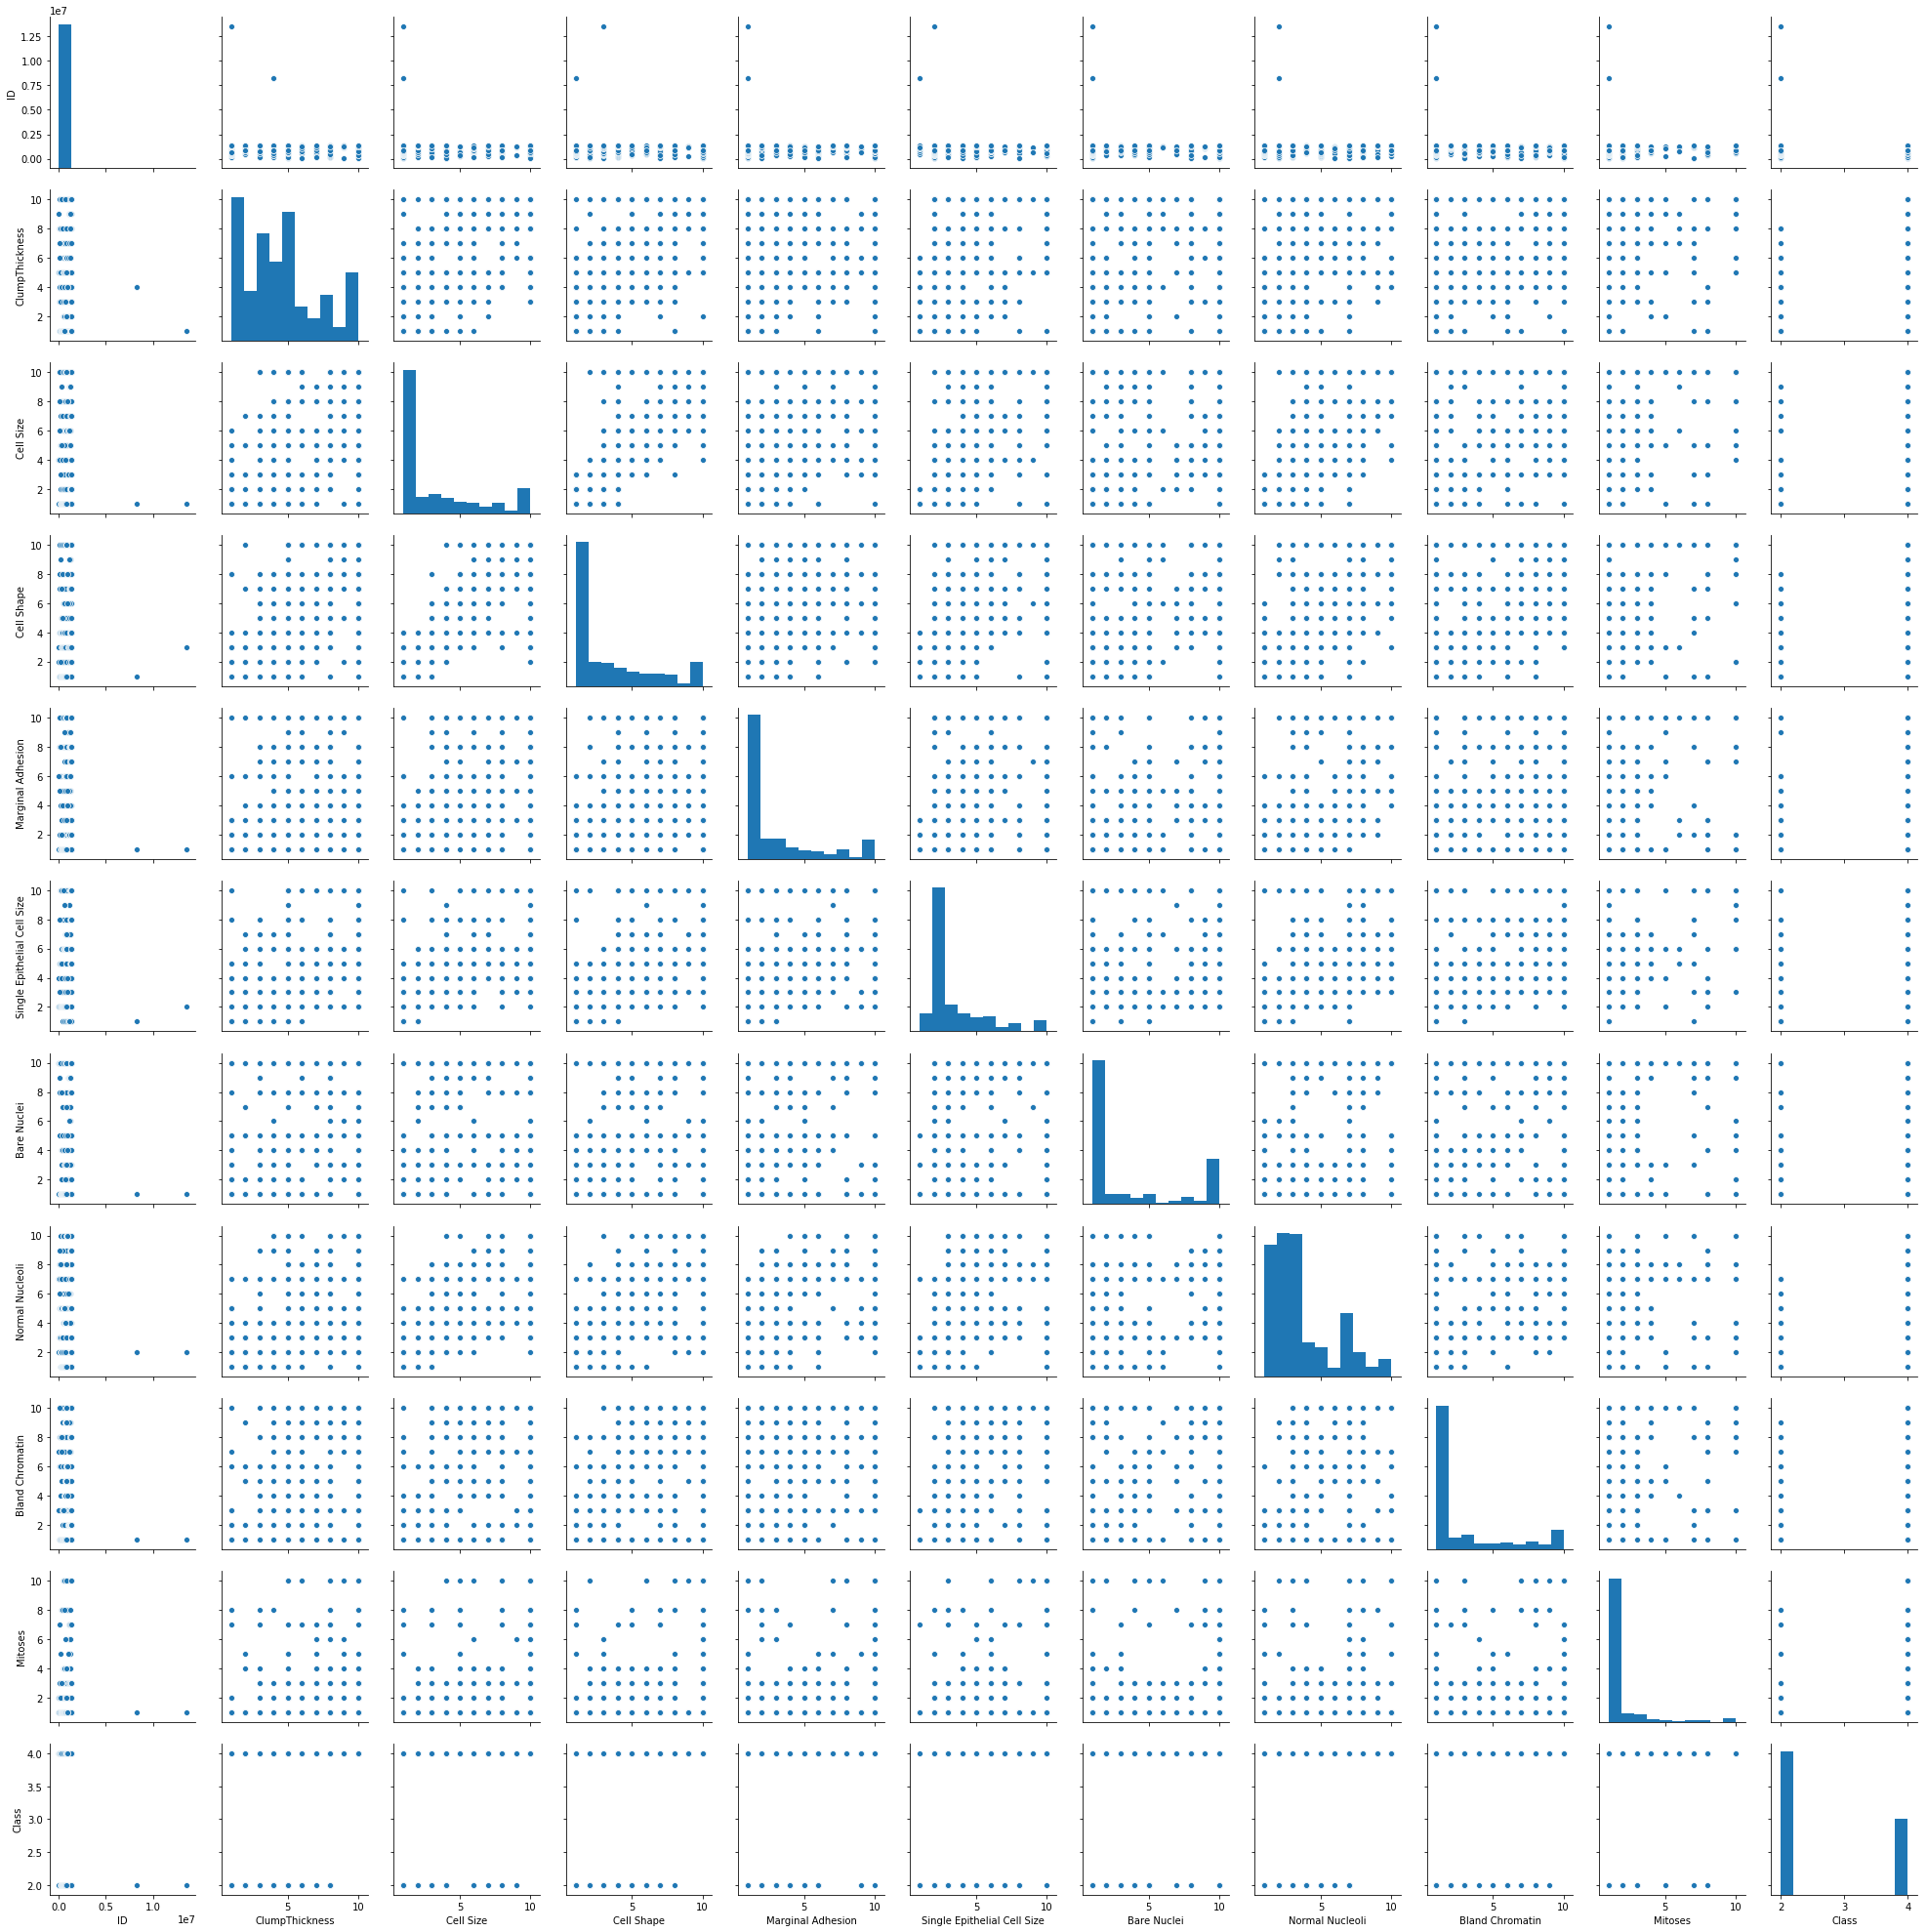

In [28]:
sns.pairplot(data)

C:\Users\rwuser2\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


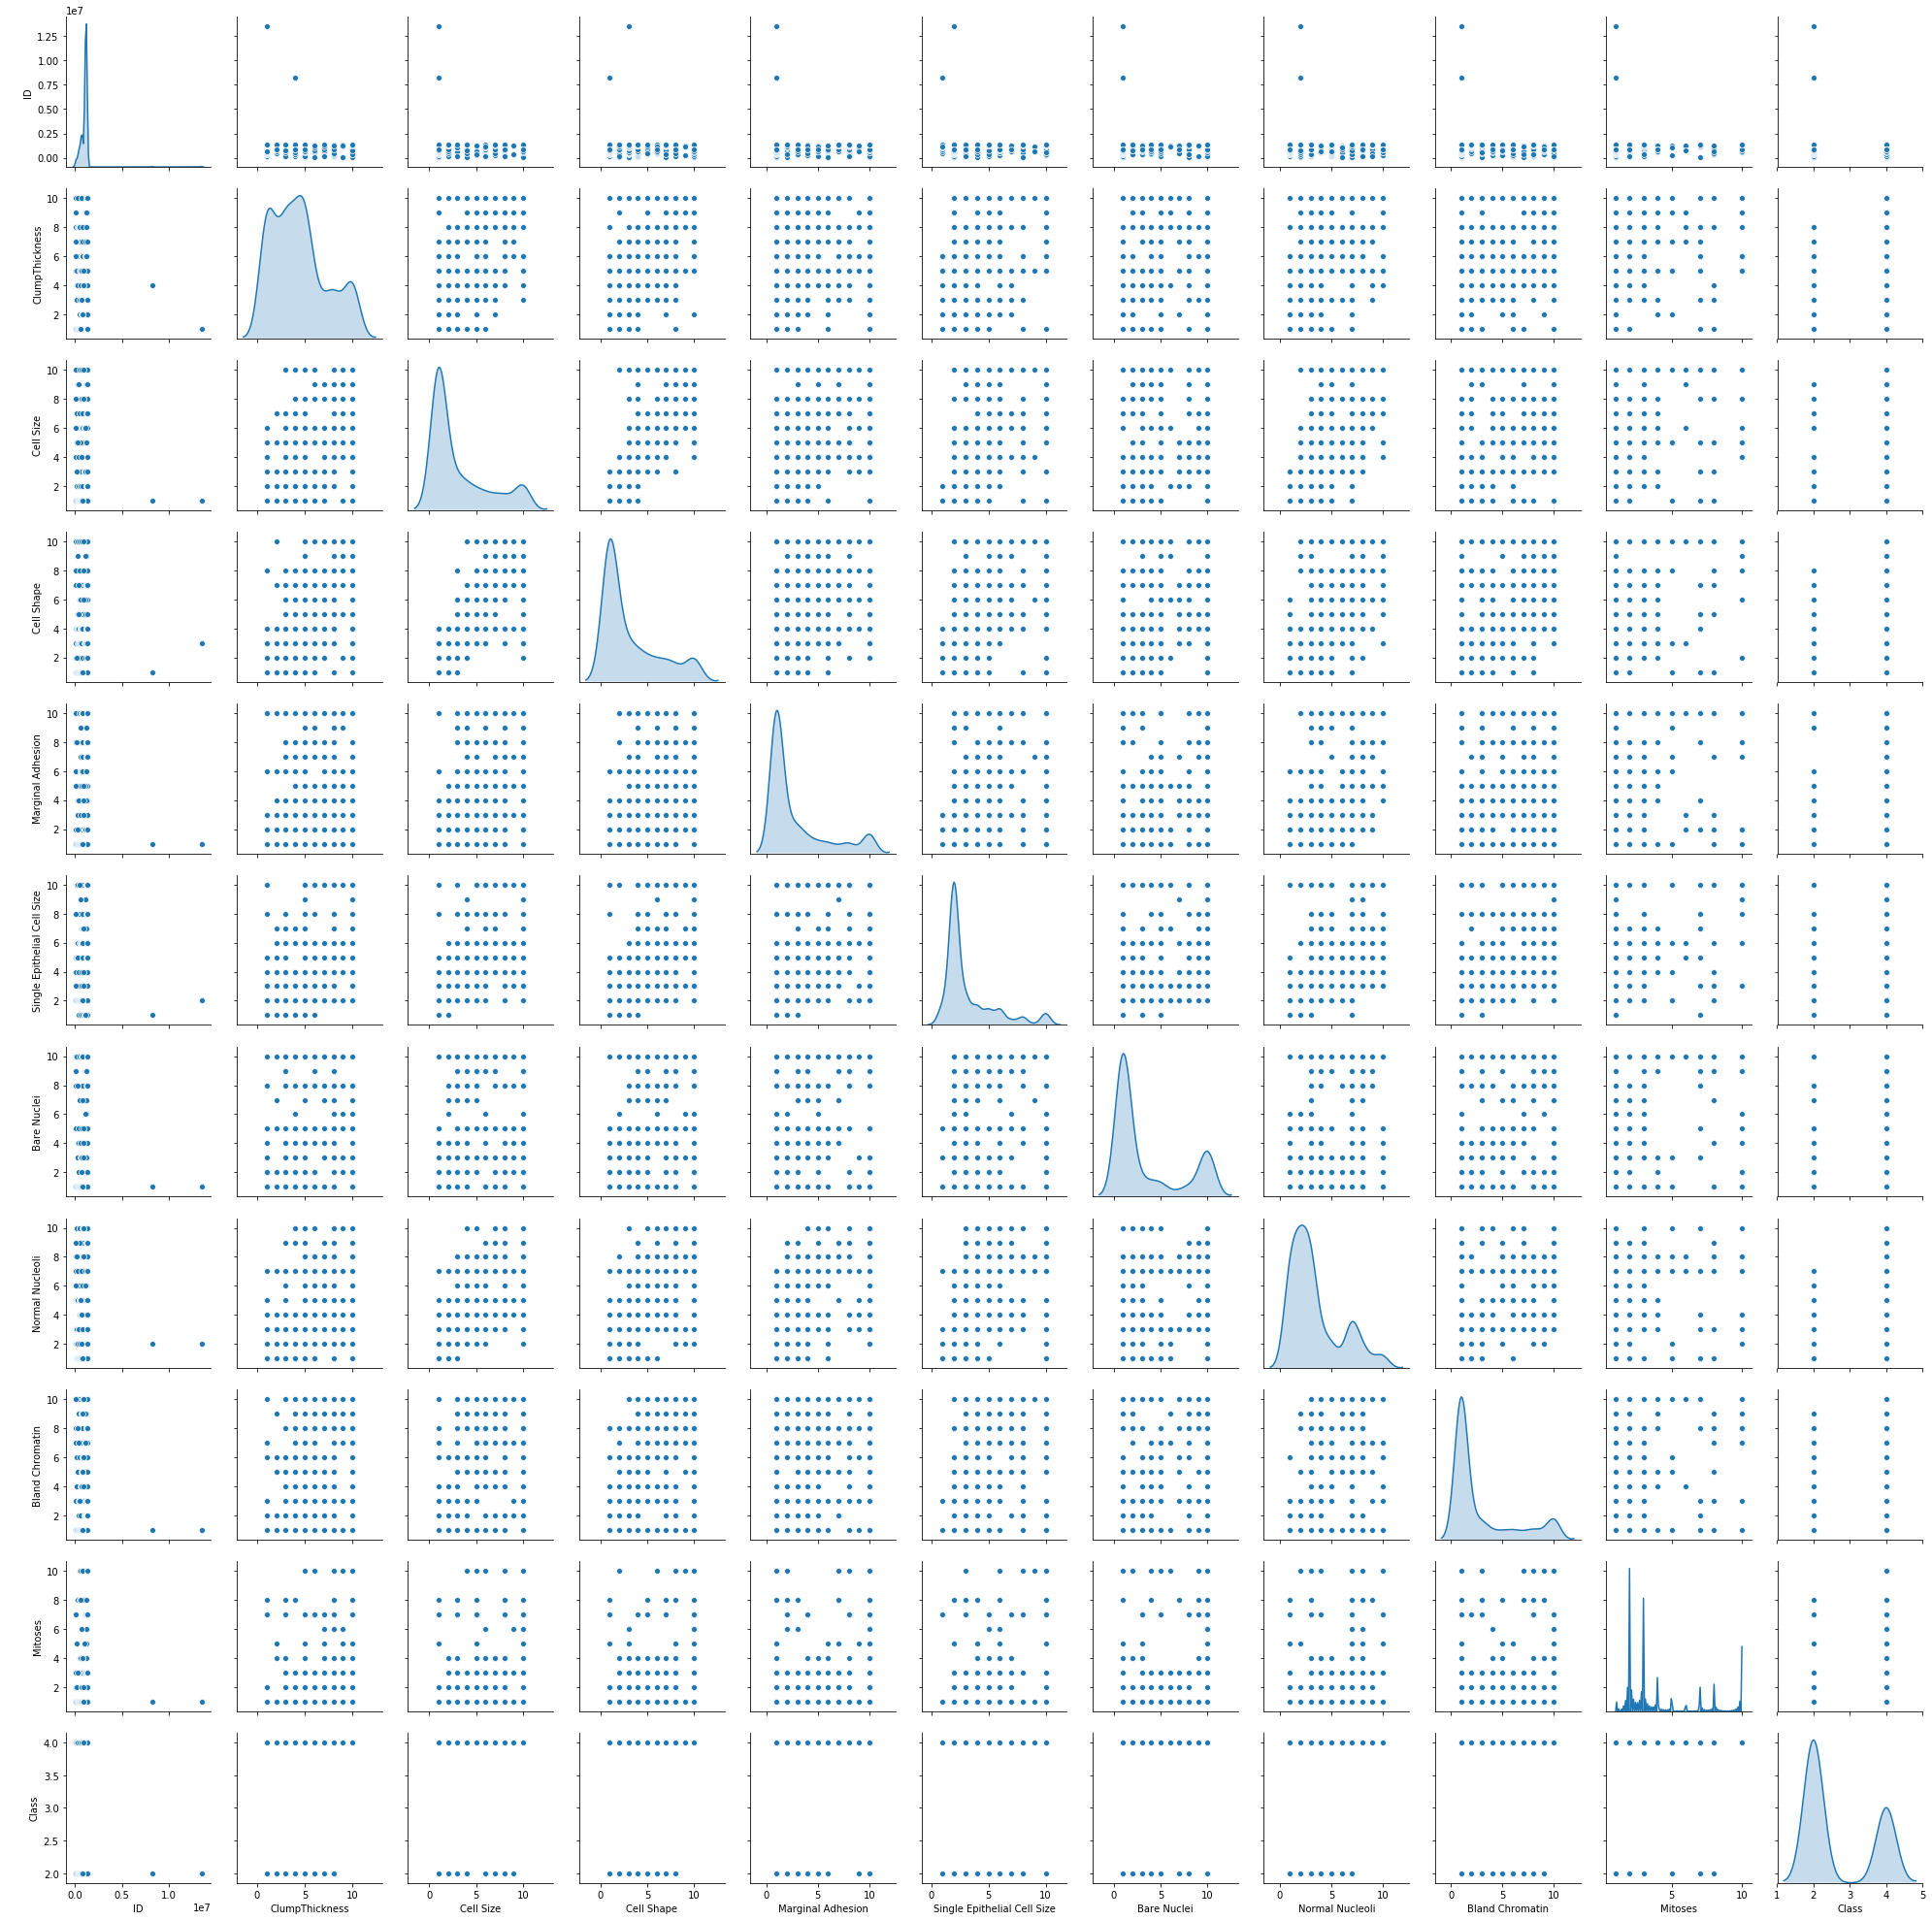

In [29]:
sns.pairplot(data, diag_kind='kde')

In [30]:
# Cell size shows high significance with cell shape,marginal adhesion, single epithelial cell size,bare nuclei, normal nucleoli 
# and bland chromatin
# Target variable shows high correlation with most of these variables

In [31]:
#Let us check for pair plots

In [32]:
# Relationship between variables shows come correlation. 
# Distribution of variables shows most of the values are concentrated on lower side, though range remains same for all that is 
# Between 1 to 10

### Cell Shape and Cell Size are highly correlated

### Data is right skewed, and majority of the data is on the left (high peaks)

### In Class column we have inbalance of data (we have only Class 2 and  Class 4) 

# Q5 Remove any unwanted columns or outliers, standardize variables in pre-processing step

In [33]:
# We could see most of the outliers are now removed.

In [34]:
data2 = data.drop(columns=['ID', 'Class'])
data2.head()

,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Mitoses
0,5,1,1,1,2,1,3,1,1
1,5,4,4,5,7,10,3,2,1
2,3,1,1,1,2,2,3,1,1
3,6,8,8,1,3,4,3,7,1
4,4,1,1,3,2,1,3,1,1


In [35]:
import matplotlib.pyplot as plt

[Text(0, 0, 'ClumpThickness'),
 Text(0, 0, 'Cell Size'),
 Text(0, 0, 'Cell Shape'),
 Text(0, 0, 'Marginal Adhesion'),
 Text(0, 0, 'Single Epithelial Cell Size'),
 Text(0, 0, 'Bare Nuclei'),
 Text(0, 0, 'Normal Nucleoli'),
 Text(0, 0, 'Bland Chromatin'),
 Text(0, 0, 'Mitoses')]

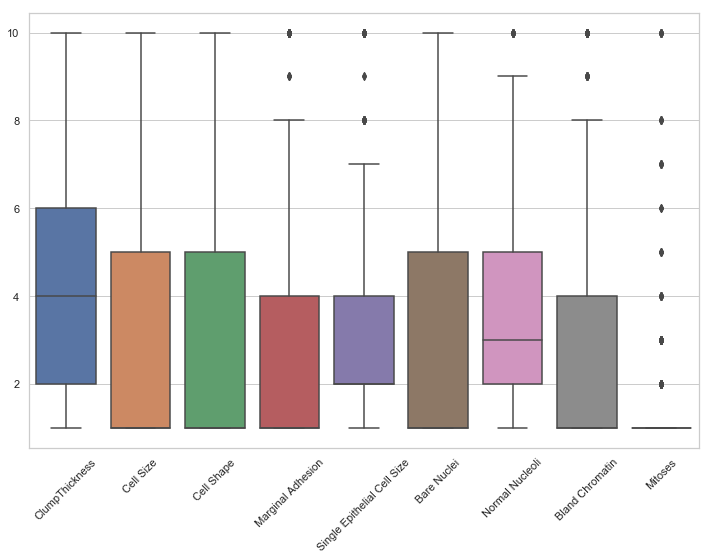

In [36]:
plt.figure(figsize=(12,8))
labels = data2.columns
sns.set(style='whitegrid')
sbplot = sns.boxplot(data=data2)
sbplot.set_xticklabels(labels=labels, rotation=45)

In [37]:
pd.crosstab(data['Mitoses'], data['Class'])

Class,2,4
Mitoses,,
1,445,134
2,8,27
3,2,31
4,0,12
5,1,5
6,0,3
7,1,8
8,1,7
10,0,14


In [38]:
data3 = data

In [39]:
data3['Mitoses'] = np.where(data3['Mitoses']>=4, 3, data3['Mitoses'])

In [40]:
pd.crosstab(data3['Mitoses'], data3['Class'])

Class,2,4
Mitoses,,
1,445,134
2,8,27
3,5,80


In [41]:
data.columns

Index(['ID', 'ClumpThickness', 'Cell Size', 'Cell Shape', 'Marginal Adhesion',
       'Single Epithelial Cell Size', 'Bare Nuclei', 'Normal Nucleoli',
       'Bland Chromatin', 'Mitoses', 'Class'],
      dtype='object')

In [42]:
pd.crosstab(data['Bland Chromatin'], data['Class'])

Class,2,4
Bland Chromatin,,
1,402,41
2,30,6
3,12,32
4,1,17
5,2,17
6,4,18
7,2,14
8,4,20
9,1,15


In [43]:
data3['Bland Chromatin'] = np.where(data3['Bland Chromatin']>=9, 8, data3['Bland Chromatin'])

In [44]:
pd.crosstab(data3['Bland Chromatin'], data3['Class'])

Class,2,4
Bland Chromatin,,
1,402,41
2,30,6
3,12,32
4,1,17
5,2,17
6,4,18
7,2,14
8,5,96


In [45]:
pd.crosstab(data['Normal Nucleoli'], data['Class'])

Class,2,4
Normal Nucleoli,,
1,150,2
2,159,7
3,129,36
4,8,32
5,4,30
6,1,9
7,7,66
8,0,28
9,0,11


In [46]:
data3['Normal Nucleoli'] = np.where(data3['Normal Nucleoli']>=8, 7, data3['Normal Nucleoli'])

In [47]:
pd.crosstab(data3['Normal Nucleoli'], data3['Class'])

Class,2,4
Normal Nucleoli,,
1,150,2
2,159,7
3,129,36
4,8,32
5,4,30
6,1,9
7,7,125


In [48]:
pd.crosstab(data['Single Epithelial Cell Size'], data['Class'])

Class,2,4
Single Epithelial Cell Size,,
1,46,1
2,363,23
3,29,43
4,7,41
5,5,34
6,2,39
7,3,9
8,2,19
9,0,2


In [49]:
data3['Single Epithelial Cell Size'] = np.where(data3['Single Epithelial Cell Size']>=7, 6, data3['Single Epithelial Cell Size'])

In [50]:
pd.crosstab(data3['Single Epithelial Cell Size'], data3['Class'])

Class,2,4
Single Epithelial Cell Size,,
1,46,1
2,363,23
3,29,43
4,7,41
5,5,34
6,8,99


In [51]:
pd.crosstab(data['Marginal Adhesion'], data['Class'])

Class,2,4
Marginal Adhesion,,
1,375,32
2,37,21
3,31,27
4,5,28
5,4,19
6,4,18
7,0,13
8,0,25
9,1,4


In [52]:
data3['Marginal Adhesion'] = np.where(data3['Marginal Adhesion']>=7, 6, data3['Marginal Adhesion'])

In [53]:
pd.crosstab(data3['Marginal Adhesion'], data3['Class'])

Class,2,4
Marginal Adhesion,,
1,375,32
2,37,21
3,31,27
4,5,28
5,4,19
6,6,114


In [54]:
c_dat = data
#Removing outliers
def IQR_outliers_detect(column):
    q1 = c_dat[column].quantile(.25)
    q3 = c_dat[column].quantile(.75)
    IQR = q3-q1
    print("\nColumn Name: ", column)
    print("IQR : {}".format(IQR))
    upper = q3+(1.5*IQR)
    lower = q1-(1.5*IQR)
    print("Upper Cap : {}".format(upper))
    print("Lower Cap : {}".format(lower))

In [55]:
# Checking for upper and lower cap for per features with ourtliers
print(IQR_outliers_detect('Mitoses'))
print(IQR_outliers_detect('Bland Chromatin'))
print(IQR_outliers_detect('Normal Nucleoli'))
print(IQR_outliers_detect('Single Epithelial Cell Size'))
print(IQR_outliers_detect('Marginal Adhesion'))


Column Name:  Mitoses
IQR : 0.0
Upper Cap : 1.0
Lower Cap : 1.0
None

Column Name:  Bland Chromatin
IQR : 3.0
Upper Cap : 8.5
Lower Cap : -3.5
None

Column Name:  Normal Nucleoli
IQR : 3.0
Upper Cap : 9.5
Lower Cap : -2.5
None

Column Name:  Single Epithelial Cell Size
IQR : 2.0
Upper Cap : 7.0
Lower Cap : -1.0
None

Column Name:  Marginal Adhesion
IQR : 3.0
Upper Cap : 8.5
Lower Cap : -3.5
None


In [56]:
data3 = data3.drop(columns=['ID', 'Class'])
data3.head()

,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Mitoses
0,5,1,1,1,2,1,3,1,1
1,5,4,4,5,6,10,3,2,1
2,3,1,1,1,2,2,3,1,1
3,6,8,8,1,3,4,3,7,1
4,4,1,1,3,2,1,3,1,1


[Text(0, 0, 'ClumpThickness'),
 Text(0, 0, 'Cell Size'),
 Text(0, 0, 'Cell Shape'),
 Text(0, 0, 'Marginal Adhesion'),
 Text(0, 0, 'Single Epithelial Cell Size'),
 Text(0, 0, 'Bare Nuclei'),
 Text(0, 0, 'Normal Nucleoli'),
 Text(0, 0, 'Bland Chromatin'),
 Text(0, 0, 'Mitoses')]

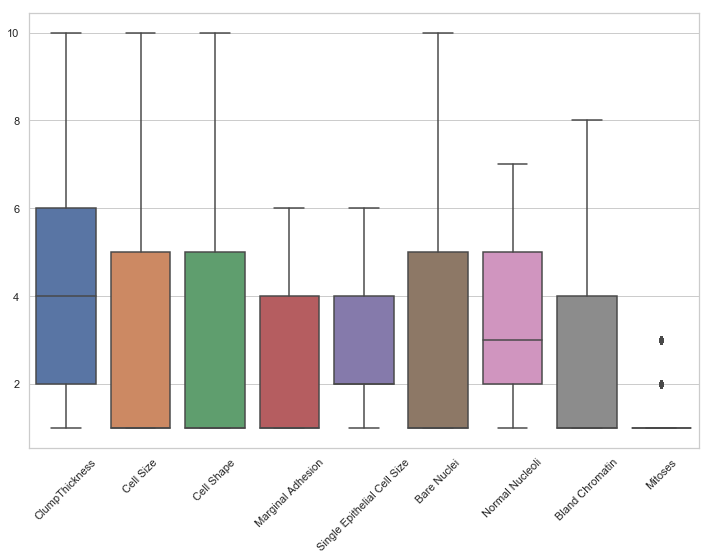

In [57]:
plt.figure(figsize=(12,8))
labels = data3.columns
sns.set(style='whitegrid')
sbplot = sns.boxplot(data=data3)
sbplot.set_xticklabels(labels=labels, rotation=45)

### Most of the outliers are gone as a result of Outlier treatment

# Q6 Create a covariance matrix for identifying Principal components

In [61]:
data3.head()

,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Mitoses
0,5,1,1,1,2,1,3,1,1
1,5,4,4,5,6,10,3,2,1
2,3,1,1,1,2,2,3,1,1
3,6,8,8,1,3,4,3,7,1
4,4,1,1,3,2,1,3,1,1


In [68]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled = scaler.fit(data3)

C:\Users\rwuser2\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int32, int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)


In [69]:
data_scaled= scaler.transform(data3)

C:\Users\rwuser2\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning: Data with input dtype int32, int64 were all converted to float64 by StandardScaler.
  """Entry point for launching an IPython kernel.


In [71]:
data_scaled

array([[ 0.20693572, -0.69999505, -0.74329904, ..., -0.13321219,
        -0.63679683, -0.43696217],
       [ 0.20693572,  0.28384518,  0.2668747 , ..., -0.13321219,
        -0.25537354, -0.43696217],
       [-0.50386559, -0.69999505, -0.74329904, ..., -0.13321219,
        -0.63679683, -0.43696217],
       ...,
       [ 0.20693572,  2.25152563,  2.28722218, ...,  1.76710049,
         2.03316624,  1.05297225],
       [-0.14846494,  1.59563215,  0.94032386, ...,  1.76710049,
         1.27031965, -0.43696217],
       [-0.14846494,  1.59563215,  1.61377302, ...,  1.76710049,
         0.50747306, -0.43696217]])

In [72]:
# PCA
# Step 1 - Create covariance matrix

cov_matrix = np.cov(data_scaled.T)

In [73]:
cov_matrix

array([[1.00143266, 0.64583645, 0.65552689, 0.52805007, 0.56413691,
        0.5908535 , 0.57283842, 0.54951479, 0.42662567],
       [0.64583645, 1.00143266, 0.90818117, 0.7298963 , 0.79059498,
        0.68765657, 0.74365474, 0.72848823, 0.51272252],
       [0.65552689, 0.90818117, 1.00143266, 0.70724262, 0.76233939,
        0.70848734, 0.72819623, 0.72311963, 0.48335106],
       [0.52805007, 0.7298963 , 0.70724262, 1.00143266, 0.68150425,
        0.69634447, 0.68883525, 0.64486398, 0.45179509],
       [0.56413691, 0.79059498, 0.76233939, 0.68150425, 1.00143266,
        0.64866184, 0.6693079 , 0.70011922, 0.49887609],
       [0.5908535 , 0.68765657, 0.70848734, 0.69634447, 0.64866184,
        1.00143266, 0.6955454 , 0.59778885, 0.4537019 ],
       [0.57283842, 0.74365474, 0.72819623, 0.68883525, 0.6693079 ,
        0.6955454 , 1.00143266, 0.67699674, 0.41528828],
       [0.54951479, 0.72848823, 0.72311963, 0.64486398, 0.70011922,
        0.59778885, 0.67699674, 1.00143266, 0.49155688],


# Q7 Identify eigen values and eigen vector

In [ ]:
# Step 2- Get eigen values and eigen vector

In [81]:
eigen_values, eigen_vectors = np.linalg.eig(cov_matrix)

In [82]:
eigen_values

array([6.11941351, 0.67664394, 0.51836952, 0.08837403, 0.44271117,
       0.33933624, 0.25135733, 0.29773193, 0.27895632])

In [87]:
eigen_vectors

array([[ 0.30051951,  0.00577173,  0.89813951,  0.00877101,  0.08008489,
         0.07883742,  0.16069286,  0.25047129,  0.04166788],
       [ 0.37192628, -0.07838829, -0.03606556,  0.73249537,  0.24874604,
        -0.30053686, -0.27941571, -0.18482547,  0.23074954],
       [ 0.3682761 , -0.11852801,  0.02679609, -0.66535851,  0.22825343,
        -0.2880035 , -0.44879425, -0.22871848,  0.13464687],
       [ 0.33664513, -0.13610476, -0.2794006 , -0.05301795, -0.38651117,
        -0.14549446,  0.01572802,  0.70461954,  0.34637315],
       [ 0.34724366, -0.00902983, -0.20495443, -0.07466343,  0.27772578,
        -0.3956271 ,  0.6829245 , -0.02101649, -0.36232495],
       [ 0.3330684 , -0.12824338,  0.07135261,  0.08802127, -0.64736349,
        -0.01688468, -0.20806034, -0.21103789, -0.59379245],
       [ 0.34068074, -0.2370153 , -0.09777647, -0.05086583, -0.17119829,
         0.50450526,  0.36519341, -0.46098479,  0.43116725],
       [ 0.33513894,  0.02353939, -0.23109584,  0.02965138,  0

# Q8 Find variance and cumulative variance by each eigen vector

In [88]:
eigen_values

array([6.11941351, 0.67664394, 0.51836952, 0.08837403, 0.44271117,
       0.33933624, 0.25135733, 0.29773193, 0.27895632])

In [89]:
(eigen_values/9.01)*100

array([67.91801899,  7.50992162,  5.75326877,  0.98084388,  4.9135535 ,
        3.76621793,  2.78975944,  3.30446092,  3.09607463])

In [84]:
cum_sum = np.cumsum(eigen_values)
cum_sum 

array([6.11941351, 6.79605745, 7.31442696, 7.402801  , 7.84551217,
       8.1848484 , 8.43620573, 8.73393766, 9.01289398])

In [90]:
cum_var = (cum_sum/9.01)*100
cum_var

array([ 67.91801899,  75.42794061,  81.18120938,  82.16205326,
        87.07560676,  90.84182469,  93.63158413,  96.93604505,
       100.03211968])

# Q9 Use PCA command from sklearn and find Principal Components. Transform data to components formed

In [91]:
from sklearn.decomposition import PCA

In [92]:
pca = PCA()
pca.fit(data3)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [95]:
pca.components_

array([[ 3.30963683e-01,  4.35694115e-01,  4.24695843e-01,
         2.43239963e-01,  2.01474609e-01,  4.84739887e-01,
         2.71328607e-01,  3.29599422e-01,  5.72858746e-02],
       [ 1.22115685e-01,  3.32784005e-01,  2.68107221e-01,
        -4.41356969e-02,  9.47600177e-02, -8.37606070e-01,
        -4.40076715e-03,  2.99496231e-01,  1.52438614e-02],
       [-9.24501345e-01,  1.52178280e-01,  1.06570811e-01,
         1.55887328e-01,  9.65158129e-02,  5.11268698e-02,
         1.10792009e-01,  2.49551678e-01, -8.18136811e-04],
       [-1.21650295e-01,  4.05424871e-01,  4.07612761e-01,
        -3.00159340e-02, -3.36635418e-04, -1.04617758e-02,
        -1.16559621e-01, -7.99314003e-01, -3.44118739e-02],
       [-4.42723028e-02,  3.62371524e-02,  2.68968888e-01,
        -4.76046026e-01, -3.85671450e-03,  2.25260579e-01,
        -7.51364546e-01,  2.85421109e-01,  3.14905684e-02],
       [ 5.70439510e-02,  2.54529793e-02, -1.51215498e-01,
         7.82234729e-01,  1.53128229e-01, -5.701876

In [98]:
pca.explained_variance_

array([41.6623266 ,  4.60612811,  3.80529467,  2.45578034,  1.53564239,
        1.26903518,  0.86423006,  0.71168414,  0.30151117])

In [99]:
pca.explained_variance_ratio_

array([0.72821426, 0.08051034, 0.0665126 , 0.04292449, 0.02684144,
       0.02218142, 0.01510585, 0.0124395 , 0.0052701 ])

In [101]:
np.cumsum(pca.explained_variance_ratio_)*100

array([ 72.82142574,  80.87245993,  87.52372034,  91.81616967,
        94.5003133 ,  96.71845516,  98.22903967,  99.47298974,
       100.        ])

In [96]:
X_pca = pca.transform(data3)

In [97]:
X_pca.shape

(699, 9)

In [106]:
#pca2 = PCA(n_components=6)

# Q10 Find correlation between components and features

In [102]:
pca_df = pd.DataFrame(data=pca.components_, columns=data3.columns)

In [103]:
pca_df.head()

,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Mitoses
0,0.330964,0.435694,0.424696,0.243240,0.201475,0.484740,0.271329,0.329599,0.057286
1,0.122116,0.332784,0.268107,-0.044136,0.094760,-0.837606,-0.004401,0.299496,0.015244
2,-0.924501,0.152178,0.106571,0.155887,0.096516,0.051127,0.110792,0.249552,-0.000818
3,-0.121650,0.405425,0.407613,-0.030016,-0.000337,-0.010462,-0.116560,-0.799314,-0.034412
4,-0.044272,0.036237,0.268969,-0.476046,-0.003857,0.225261,-0.751365,0.285421,0.031491


In [104]:
pca_df.corr()

,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Mitoses
ClumpThickness,1.000000,0.254218,0.030604,0.026851,0.014083,-0.003831,-0.081205,0.023893,0.089128
Cell Size,0.254218,1.000000,-0.185858,-0.163063,-0.085525,0.023268,0.493153,-0.145103,-0.541268
Cell Shape,0.030604,-0.185858,1.000000,-0.019631,-0.010296,0.002801,0.059369,-0.017468,-0.065161
Marginal Adhesion,0.026851,-0.163063,-0.019631,1.000000,-0.009033,0.002458,0.052087,-0.015326,-0.057169
Single Epithelial Cell Size,0.014083,-0.085525,-0.010296,-0.009033,1.000000,0.001289,0.027319,-0.008038,-0.029985
Bare Nuclei,-0.003831,0.023268,0.002801,0.002458,0.001289,1.000000,-0.007433,0.002187,0.008158
Normal Nucleoli,-0.081205,0.493153,0.059369,0.052087,0.027319,-0.007433,1.000000,0.046350,0.172898
Bland Chromatin,0.023893,-0.145103,-0.017468,-0.015326,-0.008038,0.002187,0.046350,1.000000,-0.050873
Mitoses,0.089128,-0.541268,-0.065161,-0.057169,-0.029985,0.008158,0.172898,-0.050873,1.000000


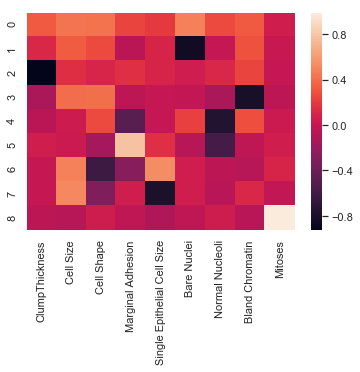

In [105]:
sns.heatmap(pca_df)

# Popularity Based Recommendation System

### About Dataset

Anonymous Ratings on jokes.

1. Ratings are real values ranging from -10.00 to +10.00 (the value "99" corresponds to "null" = "not rated").

2. One row per user

3. The first column gives the number of jokes rated by that user. The next 100 columns give the ratings for jokes 01 - 100.

# Q11 Read the dataset(jokes.csv)

Take care about the header in read_csv() as there are no column names given in the dataset. 

In [114]:
jokes_df = pd.read_csv("jokes.csv")
jokes_df.head()

,NumJokes,Joke1,Joke2,Joke3,Joke4,Joke5,Joke6,Joke7,Joke8,Joke9,...,Joke91,Joke92,Joke93,Joke94,Joke95,Joke96,Joke97,Joke98,Joke99,Joke100
0,74,-7.82,8.79,-9.66,-8.16,-7.52,-8.50,-9.85,4.17,-8.98,...,2.82,99.00,99.00,99.00,99.00,99.00,-5.63,99.00,99.00,99.00
1,100,4.08,-0.29,6.36,4.37,-2.38,-9.66,-0.73,-5.34,8.88,...,2.82,-4.95,-0.29,7.86,-0.19,-2.14,3.06,0.34,-4.32,1.07
2,49,99.00,99.00,99.00,99.00,9.03,9.27,9.03,9.27,99.00,...,99.00,99.00,99.00,9.08,99.00,99.00,99.00,99.00,99.00,99.00
3,48,99.00,8.35,99.00,99.00,1.80,8.16,-2.82,6.21,99.00,...,99.00,99.00,99.00,0.53,99.00,99.00,99.00,99.00,99.00,99.00
4,91,8.50,4.61,-4.17,-5.39,1.36,1.60,7.04,4.61,-0.44,...,5.19,5.58,4.27,5.19,5.73,1.55,3.11,6.55,1.80,1.60


# Q12 Consider `ratings` named dataframe with only first 200 rows and all columns from 1(first column is 0) of dataset

In [117]:
ratings = jokes_df.iloc[0:200, 1:]
ratings

,Joke1,Joke2,Joke3,Joke4,Joke5,Joke6,Joke7,Joke8,Joke9,Joke10,...,Joke91,Joke92,Joke93,Joke94,Joke95,Joke96,Joke97,Joke98,Joke99,Joke100
0,-7.82,8.79,-9.66,-8.16,-7.52,-8.50,-9.85,4.17,-8.98,-4.76,...,2.82,99.00,99.00,99.00,99.00,99.00,-5.63,99.00,99.00,99.00
1,4.08,-0.29,6.36,4.37,-2.38,-9.66,-0.73,-5.34,8.88,9.22,...,2.82,-4.95,-0.29,7.86,-0.19,-2.14,3.06,0.34,-4.32,1.07
2,99.00,99.00,99.00,99.00,9.03,9.27,9.03,9.27,99.00,99.00,...,99.00,99.00,99.00,9.08,99.00,99.00,99.00,99.00,99.00,99.00
3,99.00,8.35,99.00,99.00,1.80,8.16,-2.82,6.21,99.00,1.84,...,99.00,99.00,99.00,0.53,99.00,99.00,99.00,99.00,99.00,99.00
4,8.50,4.61,-4.17,-5.39,1.36,1.60,7.04,4.61,-0.44,5.73,...,5.19,5.58,4.27,5.19,5.73,1.55,3.11,6.55,1.80,1.60
5,-6.17,-3.54,0.44,-8.50,-7.09,-4.32,-8.69,-0.87,-6.65,-1.80,...,-3.54,-6.89,-0.68,-2.96,-2.18,-3.35,0.05,-9.08,-5.05,-3.45
6,99.00,99.00,99.00,99.00,8.59,-9.85,7.72,8.79,99.00,99.00,...,99.00,99.00,99.00,99.00,99.00,2.33,99.00,99.00,99.00,99.00
7,6.84,3.16,9.17,-6.21,-8.16,-1.70,9.27,1.41,-5.19,-4.42,...,7.23,-1.12,-0.10,-5.68,-3.16,-3.35,2.14,-0.05,1.31,0.00
8,-3.79,-3.54,-9.42,-6.89,-8.74,-0.29,-5.29,-8.93,-7.86,-1.60,...,4.37,-0.29,4.17,-0.29,-0.29,-0.29,-0.29,-0.29,-3.40,-4.95
9,3.01,5.15,5.15,3.01,6.41,5.15,8.93,2.52,3.01,8.16,...,99.00,4.47,99.00,99.00,99.00,99.00,99.00,99.00,99.00,99.00


In [118]:
ratings.shape

(200, 100)

In [119]:
ratings.head()

,Joke1,Joke2,Joke3,Joke4,Joke5,Joke6,Joke7,Joke8,Joke9,Joke10,...,Joke91,Joke92,Joke93,Joke94,Joke95,Joke96,Joke97,Joke98,Joke99,Joke100
0,-7.82,8.79,-9.66,-8.16,-7.52,-8.50,-9.85,4.17,-8.98,-4.76,...,2.82,99.00,99.00,99.00,99.00,99.00,-5.63,99.00,99.00,99.00
1,4.08,-0.29,6.36,4.37,-2.38,-9.66,-0.73,-5.34,8.88,9.22,...,2.82,-4.95,-0.29,7.86,-0.19,-2.14,3.06,0.34,-4.32,1.07
2,99.00,99.00,99.00,99.00,9.03,9.27,9.03,9.27,99.00,99.00,...,99.00,99.00,99.00,9.08,99.00,99.00,99.00,99.00,99.00,99.00
3,99.00,8.35,99.00,99.00,1.80,8.16,-2.82,6.21,99.00,1.84,...,99.00,99.00,99.00,0.53,99.00,99.00,99.00,99.00,99.00,99.00
4,8.50,4.61,-4.17,-5.39,1.36,1.60,7.04,4.61,-0.44,5.73,...,5.19,5.58,4.27,5.19,5.73,1.55,3.11,6.55,1.80,1.60


# Q13 Change the column indices from 0 to 99

In [122]:
ratings.columns = range(0,100)
ratings.head()

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,-7.82,8.79,-9.66,-8.16,-7.52,-8.50,-9.85,4.17,-8.98,-4.76,...,2.82,99.00,99.00,99.00,99.00,99.00,-5.63,99.00,99.00,99.00
1,4.08,-0.29,6.36,4.37,-2.38,-9.66,-0.73,-5.34,8.88,9.22,...,2.82,-4.95,-0.29,7.86,-0.19,-2.14,3.06,0.34,-4.32,1.07
2,99.00,99.00,99.00,99.00,9.03,9.27,9.03,9.27,99.00,99.00,...,99.00,99.00,99.00,9.08,99.00,99.00,99.00,99.00,99.00,99.00
3,99.00,8.35,99.00,99.00,1.80,8.16,-2.82,6.21,99.00,1.84,...,99.00,99.00,99.00,0.53,99.00,99.00,99.00,99.00,99.00,99.00
4,8.50,4.61,-4.17,-5.39,1.36,1.60,7.04,4.61,-0.44,5.73,...,5.19,5.58,4.27,5.19,5.73,1.55,3.11,6.55,1.80,1.60


# Q14 In the dataset, the null ratings are given as 99.00, so replace all 99.00s with 0
Hint: You can use `ratings.replace(<the given value>, <new value you wanted to change with>)`

In [124]:
ratings = ratings.replace(99.00, 0)
ratings.head()

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,-7.82,8.79,-9.66,-8.16,-7.52,-8.50,-9.85,4.17,-8.98,-4.76,...,2.82,0.00,0.00,0.00,0.00,0.00,-5.63,0.00,0.00,0.00
1,4.08,-0.29,6.36,4.37,-2.38,-9.66,-0.73,-5.34,8.88,9.22,...,2.82,-4.95,-0.29,7.86,-0.19,-2.14,3.06,0.34,-4.32,1.07
2,0.00,0.00,0.00,0.00,9.03,9.27,9.03,9.27,0.00,0.00,...,0.00,0.00,0.00,9.08,0.00,0.00,0.00,0.00,0.00,0.00
3,0.00,8.35,0.00,0.00,1.80,8.16,-2.82,6.21,0.00,1.84,...,0.00,0.00,0.00,0.53,0.00,0.00,0.00,0.00,0.00,0.00
4,8.50,4.61,-4.17,-5.39,1.36,1.60,7.04,4.61,-0.44,5.73,...,5.19,5.58,4.27,5.19,5.73,1.55,3.11,6.55,1.80,1.60


# Q15 Normalize the ratings using StandardScaler and save them in `ratings_diff` variable

In [127]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled = scaler.fit(ratings)
ratings_diff = scaler.transform(ratings)

In [129]:
ratings_diff

array([[-1.85701632,  1.67164929, -2.21918089, ..., -0.02685824,
        -0.04144395, -0.16095388],
       [ 0.78949409, -0.1802773 ,  1.3727099 , ...,  0.07059963,
        -1.36765027,  0.16746078],
       [-0.11788091, -0.12112987, -0.0532842 , ..., -0.02685824,
        -0.04144395, -0.16095388],
       ...,
       [ 0.46479617, -0.89412566, -0.3156133 , ..., -0.23610604,
         0.18266036, -0.02590486],
       [-0.11788091, -0.12112987, -0.0532842 , ..., -0.02685824,
        -0.04144395, -0.16095388],
       [ 1.12308784, -1.60593445, -1.07569506, ..., -0.02685824,
        -0.04144395, -0.16095388]])

### Popularity based recommendation system

# Q16  Find the mean for each column  in `ratings_diff` i.e, for each joke

In [131]:
type(ratings_diff)

numpy.ndarray

In [132]:
ratings_diff_df = pd.DataFrame(data=ratings_diff)

In [133]:
ratings_diff_df.head()

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,-1.857016,1.671649,-2.219181,-1.935298,-1.380394,-2.240830,-1.785253,0.877475,-2.233712,-1.132409,...,0.772232,-0.055329,-0.362193,-0.184043,-0.175922,-0.140401,-1.973424,-0.026858,-0.041444,-0.160954
1,0.789494,-0.180277,1.372710,1.315712,-0.432101,-2.505530,-0.160595,-1.083559,2.200591,1.667223,...,0.772232,-1.619456,-0.453066,2.083674,-0.233389,-0.859977,0.712411,0.070600,-1.367650,0.167461
2,-0.117881,-0.121130,-0.053284,0.181880,1.672963,1.814094,1.578074,1.929134,-0.004146,-0.179172,...,-0.192459,-0.055329,-0.362193,2.435660,-0.175922,-0.140401,-0.233349,-0.026858,-0.041444,-0.160954
3,-0.117881,1.581908,-0.053284,0.181880,0.339079,1.560803,-0.532913,1.298139,-0.004146,0.189306,...,-0.192459,-0.055329,-0.362193,-0.031131,-0.175922,-0.140401,-0.233349,-0.026858,-0.041444,-0.160954
4,1.772484,0.819110,-0.988252,-1.216599,0.257903,0.063882,1.223570,0.968206,-0.113390,0.968316,...,1.582983,1.707868,0.975838,1.313343,1.557140,0.380786,0.727864,1.850639,0.511142,0.330133


In [150]:
ratings_diff_df.iloc[:, 0:100].mean()

0    -1.110223e-17
1    -9.658940e-17
2    -4.107825e-17
3     3.719247e-17
4    -8.881784e-18
5    -2.636780e-18
6    -1.665335e-18
7     2.331468e-17
8    -4.329870e-17
9    -2.553513e-17
10   -4.551914e-17
11   -8.604228e-17
12    6.661338e-17
13    5.467848e-17
14   -2.164935e-17
15   -1.065814e-16
16    1.637579e-17
17    2.331468e-17
18   -9.159340e-18
19    2.997602e-17
20    1.065814e-16
21    1.720846e-17
22   -2.775558e-17
23    4.329870e-17
24   -3.885781e-17
25   -1.498801e-17
26   -3.996803e-17
27   -9.436896e-18
28   -5.273559e-17
29    1.998401e-17
          ...     
70    7.632783e-19
71   -9.325873e-17
72   -4.024558e-17
73    7.743806e-17
74    1.290634e-17
75    3.885781e-17
76    3.747003e-18
77   -2.886580e-17
78   -9.853229e-18
79   -6.938894e-17
80    3.941292e-17
81    1.243450e-16
82    0.000000e+00
83    2.498002e-17
84   -2.045586e-16
85   -1.290634e-17
86   -8.465451e-17
87    5.107026e-17
88    2.997602e-17
89   -6.369905e-17
90   -4.385381e-17
91   -3.4972

In [151]:
ratings_col_means =  ratings_diff_df.iloc[:, 0:100].mean()

# Q17 Consider all the mean ratings and find the jokes with highest mean value and display the top 10 joke IDs.

In [152]:
ratings_means_sorted = ratings_col_means.sort_values()
top_10 = ratings_means_sorted.tail(10)
top_10

49    7.494005e-17
99    7.549517e-17
73    7.743806e-17
47    7.771561e-17
92    8.770762e-17
94    1.054712e-16
20    1.065814e-16
97    1.198694e-16
81    1.243450e-16
98    1.840889e-16
dtype: float64

In [153]:
type(top_10)

pandas.core.series.Series

In [154]:
top_10.index

Int64Index([49, 99, 73, 47, 92, 94, 20, 97, 81, 98], dtype='int64')